In [1]:
# Importing dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from scipy.stats import gaussian_kde

In [2]:
## data collection
df = pd.read_csv('gold_price.csv')
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [3]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [4]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
df.shape

(2290, 6)

In [7]:
##correlation
#positve correlation
#negative correlation
df['Date'] = pd.to_datetime(df['Date'])
correlation = df.corr()

<AxesSubplot:>

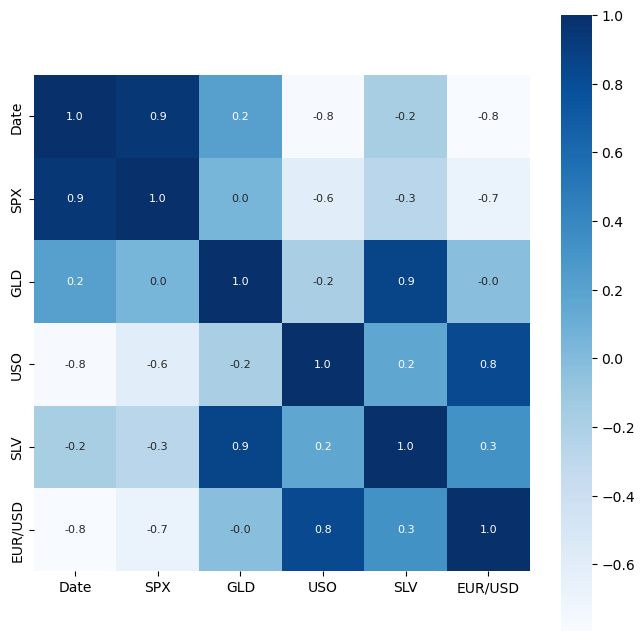

In [8]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot = True, annot_kws = {'size':8},cmap ='Blues' )

In [9]:
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


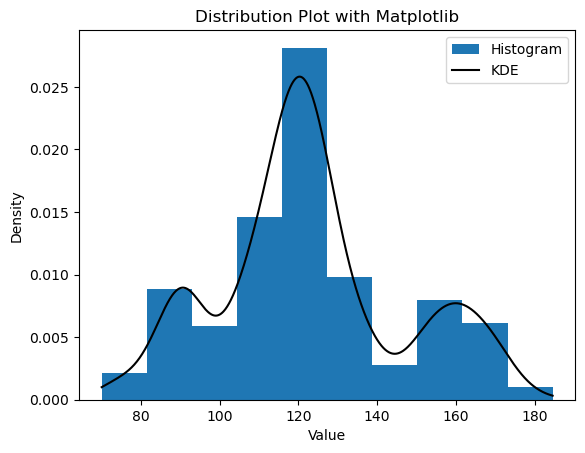

In [10]:
fig, ax = plt.subplots()
ax.hist(df['GLD'], density=True, label='Histogram')
data = df['GLD']
kde = gaussian_kde(data)  #Kernel Density Estimation (KDE)
x_range = np.linspace(data.min(), data.max(), 1000)
ax.plot(x_range, kde(x_range), color='black', label='KDE')
ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.set_title('Distribution Plot with Matplotlib')
ax.legend()
plt.show()

In [11]:
x = df.drop(['GLD','Date'],axis =1)
y= df['GLD']

In [12]:
print (x,y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns] 0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
regressor = RandomForestRegressor(n_estimators=100)

In [15]:
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [16]:
test_data_prediction = regressor.predict(x_test)

In [17]:
print(test_data_prediction)

[122.51559975 130.21570283 127.80319944  96.69849737 118.85920103
 114.36839937 124.69670153 117.62129893 108.18160067  98.33639966
  95.43229938 167.412499   148.69860046 116.46010026 170.502501
  85.04499964 123.0889988  109.05799721 113.32800095 131.49060264
 124.30759898 113.63360073 116.0928007  108.76790003 108.84560202
 125.81189938 119.12149996 112.28579933 113.61070167 125.55529897
 146.07300164  89.55950009 168.26969946 113.75099942 108.30050117
 120.10940118 141.58189881 160.89580135 174.07009812 153.32010124
 119.36920114 113.11200088 121.36419903 113.80849949 122.1402003
 108.0335009   88.49849886 114.35859917 129.76320244 117.91190103
 103.34060004 129.97100272 107.25169877 160.89850345 131.74260014
 118.19329952 147.07960062 136.36780133  95.57020113 124.62340141
 114.93219891  86.24630095 104.22579914 113.94440103  84.24229918
 122.47600046 116.56629929 113.58880172 165.27310343  92.17390047
  80.06110096 160.9571003  159.08050178 106.74780028 150.43530138
 109.7657976 

In [18]:
error_score = metrics.r2_score(y_test,test_data_prediction)
print(error_score)

0.9898392768297573


In [19]:
y_test = list(y_test)

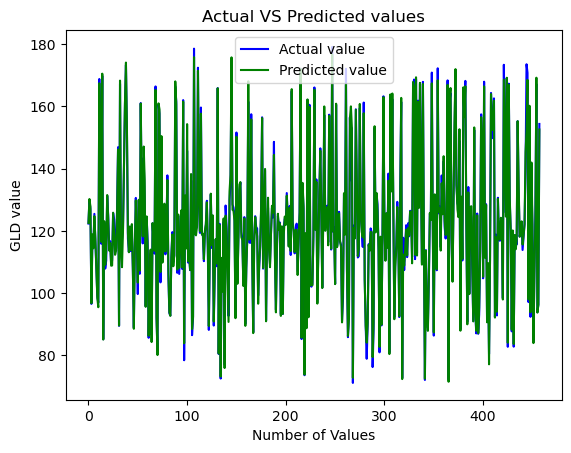

In [20]:
plt.plot(y_test,color = 'blue',label = 'Actual value')
plt.plot(test_data_prediction, color = 'green', label = 'Predicted value')
plt.title('Actual VS Predicted values')
plt.xlabel('Number of Values')
plt.ylabel('GLD value')
plt.legend()
plt.show()